# Reflection

https://github.com/langchain-ai/langgraph/blob/main/docs/docs/tutorials/reflection/reflection.ipynb

In [122]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
# from langchain_fireworks import ChatFireworks
from langchain_openai import ChatOpenAI

In [123]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system",
         "あなたは優れた5段落のエッセイを執筆することを任されたエッセイアシスタントです。"
         "ユーザーのリクエストに基づいて、可能な限り最良のエッセイを生成してください。"
         "ユーザーが批評を提供した場合、前回の試みを改訂したバージョンで返答してください。"
        ),
        # 過去のメッセージが入る
        MessagesPlaceholder(variable_name="messages"),
    ]
)

# llm = ChatFireworks(
#     model="accounts/fireworks/models/mixtral-8x7b-instruct",
# )

llm = ChatOpenAI(model="gpt-4o-mini", max_tokens=8192)
generate = prompt | llm

In [100]:
essay = ""
request = HumanMessage(
    content="『星の王子さま』が現代の子どもたちにとって重要である理由についてのエッセイを書いてください。"
)
for chunk in generate.stream({"messages": [request]}):
    print(chunk.content, end="")
    essay += chunk.content

『星の王子さま』は、アントワーヌ・ド・サン＝テグジュペリによって書かれた不朽の名作であり、現代の子どもたちにとっても重要な作品です。この物語は、単なる子供向けのファンタジーではなく、人生の深い教訓を含んでいます。現代の社会においても、この物語から学ぶことは多く、特に以下の五つの点が注目されています。

まず、純粋な心の大切さが挙げられます。『星の王子さま』は、子どもたちに大人になるにつれて失われがちな純粋さを大切にすることを教えます。現代社会では、情報過多や競争社会の中で、純粋な視点を持ち続けることは難しいかもしれません。しかし、この物語を通じて、子どもたちは物事をシンプルに考え、心の豊かさを大切にすることの重要性を学びます。

次に、友情と愛の価値を理解することができます。王子と彼が出会う様々なキャラクターとの関係は、友情や愛がどれほど大切かを示しています。バラとの関係を通じて、真の愛とは何かを考えさせられます。現代の子どもたちにとって、SNSやオンラインゲームなどでの関係が増える中、真の友情や愛の本質をこの物語から学ぶことは貴重です。

また、想像力と創造性の重要性を強調しています。王子が訪れる星々での冒険は、子どもたちに自分の想像力を育て、創造的に問題を解決する力を養うことを促します。現代では、テクノロジーの発達によって想像力が制限されがちですが、『星の王子さま』は、その想像力を解き放ち、自分の世界を築く手助けをしてくれます。

さらに、自分自身を理解することの大切さを教えてくれます。物語の中で、王子は様々な星を訪れ、自分自身についても多くを学びます。この旅を通して、子どもたちは自己理解のプロセスに励まされ、自分自身の価値観や夢を見つける手助けとなるでしょう。

最後に、人生の本質について考える機会を提供します。物語には哲学的なテーマが多く含まれており、読者に深く考えさせます。現代の子どもたちは、忙しい日常生活の中であまり時間を持たないかもしれませんが、『星の王子さま』は、立ち止まって人生の意味を考える貴重な時間を提供します。

以上のように、『星の王子さま』は現代の子どもたちにとって非常に重要な作品です。この物語を通じて、彼らは純粋さ、友情、愛、想像力、自己理解、そして人生の本質について学ぶことができます。この作品は、時代を超えて普遍的な価値を持ち続け、子ど

In [101]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "あなたはエッセイの提出物を採点している教師です。"
            "ユーザーの提出物に対する批評と提案を生成してください。"
            "長さ、深さ、スタイルなどに関する詳細な提案を提供してください。"
        ),
        
        MessagesPlaceholder(variable_name="messages"),
    ]
)
reflect = reflection_prompt | llm

In [102]:
reflection = ""
# esseyはAIMessageだったがHumanMessageに変換
for chunk in reflect.stream({"messages": [request, HumanMessage(content=essay)]}):
    print(chunk.content, end="")
    reflection += chunk.content

このエッセイは、『星の王子さま』が現代の子どもたちにとって重要である理由をしっかりと捉えており、具体的なポイントを挙げている点で評価できます。しかし、より深く掘り下げることで、さらに説得力を増すことができるでしょう。以下にいくつかの改善提案を示します。

1. **深さの向上**:
   - 各ポイントに具体的な例を加えるとよいでしょう。例えば、「純粋な心の大切さ」について述べる際に、物語のどの部分がその純粋さを象徴しているのか具体的なシーンを引用すると、読者により明確な理解を促すことができます。

2. **構造の強化**:
   - 各段落のつながりをより自然にすることができます。たとえば、「友情と愛の価値」の段落から「想像力と創造性の重要性」への移行をスムーズにするために、これらのテーマがどのように関連しているのかを示す短いつなぎの文を加えると良いでしょう。

3. **具体性の追加**:
   - 現代の子どもたちが直面している具体的な問題や状況と、『星の王子さま』のテーマを関連付けることで、より具体的な説得力を持たせることができます。例えば、SNSの影響でどのように友情が変化しているのか、具体的な状況を描写することが考えられます。

4. **スタイルの調整**:
   - 一部の文章は少し抽象的です。例えば「人生の本質について考える機会」というテーマは、どのような場面でそれを考えさせられるのか、もう少し具体的に説明することで、読者がより共感しやすくなります。

5. **長さの調整**:
   - エッセイの長さは適切ですが、各ポイントのバランスを見直し、特に重要と感じるポイントにもう少しスペースを割くことで、議論がより深くなる可能性があります。

全体として、このエッセイは『星の王子さま』の重要性をしっかりと伝えており、読者にその価値を理解させる力を持っています。提案を参考に、さらに具体的で詳細な分析を加えることで、より一層充実した内容に仕上げることができるでしょう。

In [103]:
# 役割をまたもとに戻す
for chunk in generate.stream(
    {"messages": [request, AIMessage(content=essay), HumanMessage(content=reflection)]}
):
    print(chunk.content, end="")

『星の王子さま』は、アントワーヌ・ド・サン＝テグジュペリによって書かれた不朽の名作であり、現代の子どもたちにとって重要な作品です。この物語は、単なる子供向けのファンタジーではなく、人生の深い教訓を含んでいます。特に、純粋な心の大切さ、友情と愛の価値、想像力と創造性の重要性、自分自身を理解することの大切さ、そして人生の本質について考える機会を提供する点で、現代の子どもたちにとっても貴重な教訓を与えてくれます。

まず、純粋な心の大切さについて考えてみましょう。物語の冒頭で、王子が描いた絵を大人たちが理解できず、ただの帽子だと思い込むシーンがあります。この場面は、子どもたちが持つ純粋な視点と、大人になるにつれて失われがちな想像力の重要性を象徴しています。現代社会では、情報過多や競争社会の中で、純粋な視点を持ち続けることは難しいかもしれません。この物語を通じて、子どもたちは物事をシンプルに考え、心の豊かさを大切にすることの重要性を学びます。

次に、友情と愛の価値についてです。王子と彼が出会う様々なキャラクターとの関係は、友情や愛がどれほど大切かを示しています。特に、王子とバラの関係は、真の愛とは何かを考えさせられる重要な部分です。バラは、王子にとって特別な存在であり、その唯一無二の関係を通じて、子どもたちは真の友情や愛の本質を学びます。現代の子どもたちは、SNSやオンラインゲームなどでの関係が増える中、こうした深い人間関係の価値を再認識することが求められます。

また、想像力と創造性の重要性も強調されています。王子が訪れる星々での冒険は、子どもたちに自分の想像力を育て、創造的に問題を解決する力を養うことを促します。王子が各星で出会う大人たちの奇妙な行動は、想像力を失った社会を批判する一方で、子どもたちには自分の世界を自由に想像し、創造することの楽しさを伝えています。現代では、テクノロジーの発達によって想像力が制限されがちですが、『星の王子さま』は、その想像力を解き放ち、自分の世界を築く手助けをしてくれます。

さらに、自分自身を理解することの大切さを教えてくれます。物語の中で、王子は様々な星を訪れ、自分自身についても多くを学びます。例えば、キツネとの出会いは、王子に対して「大切なことは目に見えない」という深い教訓を与えます。この旅を通して、子どもたちは自己理解のプロセス

In [154]:
from typing import Annotated
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from typing_extensions import TypedDict

In [155]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [156]:
def generation_node(state: State) -> State:
    return {"messages": [generate.invoke(state["messages"])]}

In [157]:
def reflection_node(state: State) -> State:
    # print("*** BEFORE")
    # for msg in state["messages"]:
    #     print(msg.type, msg.content[:100])

    # 入力のメッセージでは役割を入れ替える
    # generationがhumanで、reflectionがaiとする
    cls_map = {"ai": HumanMessage, "human": AIMessage}

    # はじめてに入力されたユーザのリクエストはそのまま残す
    translated = [state["messages"][0]] + [
        cls_map[msg.type](content=msg.content) for msg in state["messages"][1:]
    ]

    # print("*** AFTER")
    # for msg in translated:
    #     print(msg.type, msg.content[:100])

    res = reflect.invoke(translated)

    # 戻り値はAIであるが、ReflectionはHumanが行ったものとみなす
    return {"messages": [HumanMessage(content=res.content)]}

In [158]:
def should_continue(state: State):
    if len(state["messages"]) > 6:
        return END
    return "reflect"

In [159]:
builder = StateGraph(State)
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.add_edge(START, "generate")
builder.add_conditional_edges("generate", should_continue)
builder.add_edge("reflect", "generate")
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

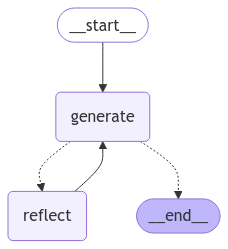

In [160]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [161]:
config = {"configurable": {"thread_id": "1"}}

In [162]:
for event in graph.stream(
    {"messages": [HumanMessage("『星の王子さま』が現代の子どもたちにとって重要である理由についてのエッセイを書いてください。")]},
    config,
    stream_mode="values"
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

『星の王子さま』が現代の子どもたちにとって重要である理由についてのエッセイを書いてください。
================================== Ai Message ==================================

### 『星の王子さま』が現代の子どもたちにとって重要である理由

フランスの作家アントワーヌ・ド・サン＝テグジュペリによって書かれた『星の王子さま』は、1943年の初版以来、世代を超えて多くの読者に愛され続けています。この物語は、一見シンプルなファンタジーのようでありながら、深い哲学的なメッセージを持っています。特に現代の子どもたちにとって、この作品は重要な教訓を提供しており、その理由は主に友情、想像力、そして大人の世界への批判にあります。

まず、友情の重要性についてです。物語の中で、王子さまは様々な星を訪れ、そこで出会うキャラクターたちとの関係を通じて、友情の本質を学びます。現代の子どもたちは、デジタルコミュニケーションの影響で対面での人間関係が希薄になりがちですが、王子さまの冒険を通じて、真の友情とは何かを考えさせられます。友達との絆や思いやりの大切さを学ぶことは、社会性を育む上で非常に重要です。

次に、想像力の価値についてです。王子さまは、彼の住む小さな星や様々な惑星を舞台に、幻想的な冒険を繰り広げます。この物語は、子どもたちに創造力を発揮することの楽しさを教えてくれます。現代社会は、効率や成果を重視する傾向があるため、子どもたちが自由に想像する時間を持つことが難しくなっています。しかし、王子さまの物語を通じて、想像力は人生を豊かにする重要な要素であることを再認識できるでしょう。

さらに、この作品は大人の世界への批判としても機能しています。王子さまが出会う大人たちは、しばしば自己中心的で、物質的な価値観に囚われています。この描写は、現代社会における大人たちの生き方に対する鋭い批評となっています。子どもたちは、物語を通じて、大人になることの意味や、社会における価値観を問い直す機会を得ることができるのです。このような視点は、彼らが成長する過程